In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook as tqdm

%matplotlib inline
sns.set()

In [3]:
train = pd.read_csv('experiments/train.csv')

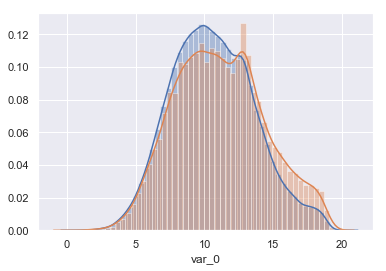

In [18]:
sns.distplot(train[train.target == 0].var_0)
sns.distplot(train[train.target == 1].var_0)


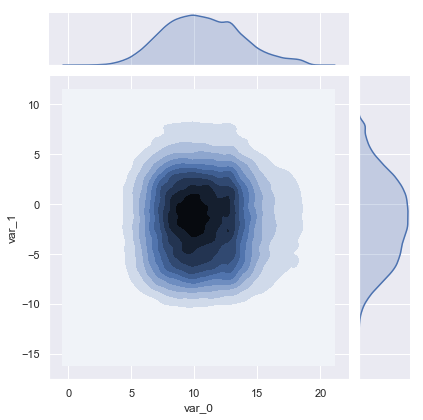

In [21]:
sns.jointplot(x='var_0', y='var_1', data=train, kind='kde')

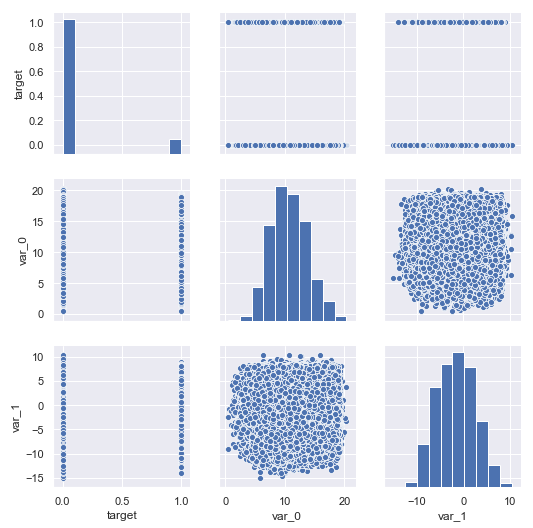

In [23]:
cols = ['target']
for i in range(0, 2):
    cols += [f'var_{i}']
sns.pairplot(train[cols])

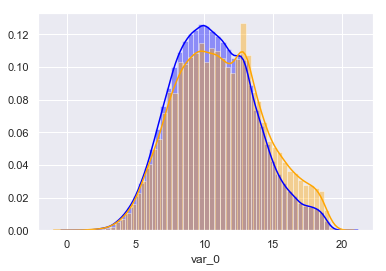

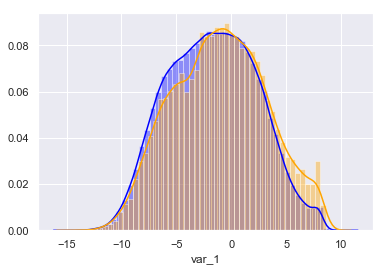

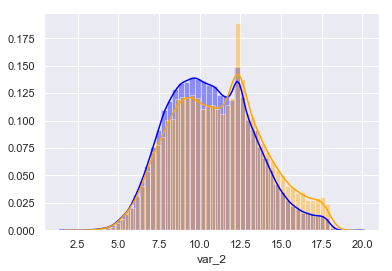

In [27]:
train_0 = train[train.target == 0]
train_1 = train[train.target == 1]
for i in range(3):
    plt.figure()
    sns.distplot(train_0[f'var_{i}'], color='blue')
    sns.distplot(train_1[f'var_{i}'], color='orange')

In [4]:
test = pd.read_csv('experiments/test.csv')

In [6]:
test = test.drop(['ID_code'], axis=1).values

In [8]:
unique_samples = []
unique_count = np.zeros_like(test)
for feature in tqdm(range(test.shape[1])):
    _, index_, count_ = np.unique(test[:, feature], return_counts=True, return_index=True)
    unique_count[index_[count_ == 1], feature] += 1

In [12]:
unique_count

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [13]:
unique_sum = np.sum(unique_count, axis=1)

In [30]:
unique_sum

array([ 0.,  0.,  0., ...,  0.,  0., 35.])

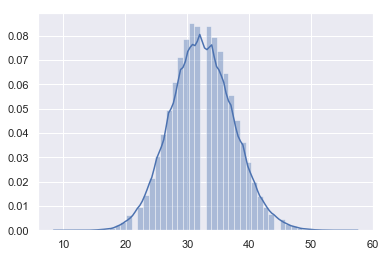

In [31]:
sns.distplot(unique_sum[unique_sum > 0])

In [33]:
unique_axis = np.sum(unique_count, axis=0)
unique_axis.shape

(200,)

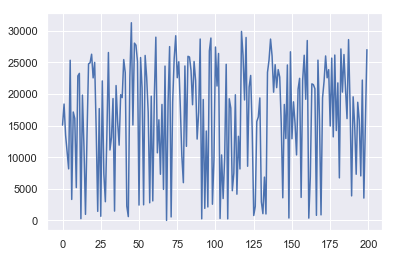

In [38]:
sns.lineplot(range(0, len(unique_axis)), unique_axis)